<a href="https://colab.research.google.com/github/zouaouisarah98/my_doc/blob/master/tensorfow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

from sklearn.preprocessing import StandardScaler

In [50]:
# importer la bdd
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_,_) = fashion_mnist.load_data()  #images_test, targets_test

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

print(images.mean())
print(images.std())

images = images.reshape(-1,784)
images = images.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)

print(images.mean())
print(images.std())


73.00877385204082
90.2745808471392
-1.0476880134421886e-18
1.0000000000000007


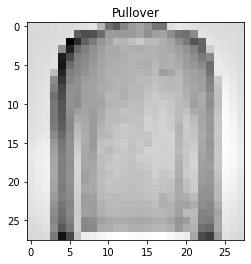

In [51]:
#ploter une seule image
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
plt.imshow(np.reshape(images[65], (28, 28)), cmap="binary")
plt.title(targets_names[targets[65]])
plt.show()

In [52]:
#creation d'un model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
print("la forme :",images[0:1].shape)
model_output = model.predict(images[0:1])
print("la forme :",model_output.shape)


la forme : (1, 784)
la forme : (1, 784)


In [57]:
#creation d'un model
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

model.add(tf.keras.layers.Dense(256,activation = "relu"))
model.add(tf.keras.layers.Dense(128,activation = "relu"))
model.add(tf.keras.layers.Dense(10,activation = "softmax"))

model_output = model.predict(images[0:1])
print(model_output,targets[0:1])


[[0.05830511 0.02714731 0.06209528 0.26939297 0.05851895 0.05883675
  0.06463476 0.00397589 0.35980886 0.0372841 ]] [9]


In [58]:
# Compiler le model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",   # type d'optimizer qui permet de minimiser l erreur
    metrics=["accuracy"]   # determiner a quelle point la prediction est correcte 
)

In [59]:
# lancer l'apprentissage (le test)
history = model.fit(images, targets, epochs=10)   #, validation_split=0.2

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 1.1381 - accuracy: 0.6246
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5255 - accuracy: 0.8171
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4228 - accuracy: 0.8531
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8679
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3463 - accuracy: 0.8806
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8899
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3053 - accuracy: 0.8939
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.9037
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.9036
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.9121

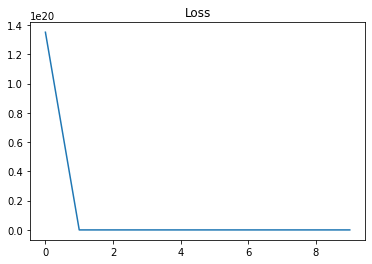

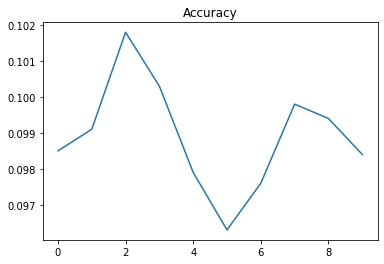

In [44]:
# avant la normalisation 
acc_curve = history.history["accuracy"]
loss_curve = history.history["loss"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()

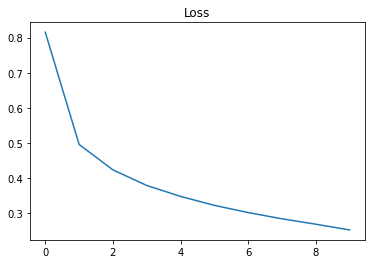

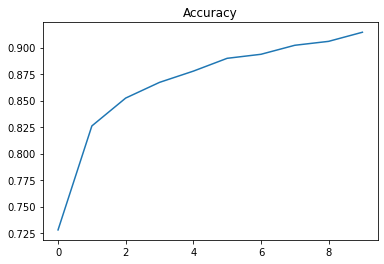

In [60]:
#apres la normalisation 
acc_curve = history.history["accuracy"]
loss_curve = history.history["loss"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()